In [18]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Purpose
This notebook explores the high demand and high demand/high wage datasets for 2017 provided by the Kansas Department of Labor. The dataset may be [found here.](https://klic.dol.ks.gov/gsipub/index.asp?docid=403)


# Import Data

In [19]:
# importing high demand data
hd = pd.read_csv("cleaned/High Demand Occupations 2017.csv") 
#renaming columns
column_names = ["SOC","Title","Job Vacancy Survey Score","Short-term Projections Score","Long-term Projections Score",
               "Total Score","Rank","Education","Work Experience","Job Training","Median Annual Wage"]
hd.columns = column_names
hd.head()

,SOC,Title,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Total Score,Rank,Education,Work Experience,Job Training,Median Annual Wage
0,41-4012,"Sales Representatives, Wholesale and Manufactu...",10,10,10,30,1,High school diploma or equivalent,None,Moderate-term on-the-job training,58146.00
1,29-1141,Registered Nurses,10,10,10,30,2,Bachelor's degree,None,None,57198.00
2,53-3032,Heavy and Tractor-Trailer Truck Drivers,10,10,10,30,3,Postsecondary nondegree award,None,Short-term on-the-job training,40375.00
3,53-7062,"Laborers and Freight, Stock, and Material Move...",10,10,10,30,4,No formal educational credential,None,Short-term on-the-job training,27891.00
4,35-1012,First-Line Supervisors of Food Preparation and...,10,10,10,30,5,High school diploma or equivalent,Less than 5 years,None,27223.00


In [20]:
# Look at summary statistics for high demand
hd.describe()

,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Total Score,Rank
count,456.000000,456.000000,456.000000,456.000000,456.00000
mean,2.587719,3.712719,3.877193,10.177632,228.50000
std,2.965920,3.013292,2.814063,7.912518,131.78012
min,0.000000,0.000000,0.000000,1.000000,1.00000
25%,0.000000,1.000000,2.000000,3.750000,114.75000
50%,2.000000,3.000000,3.000000,8.000000,228.50000
75%,5.000000,6.000000,6.000000,15.000000,342.25000
max,10.000000,10.000000,10.000000,30.000000,456.00000


In [21]:
# importing high demand/high wage data
hw = pd.read_csv("cleaned/High Demand High Wage 2017.csv")
#renaming columns
column_names = ["SOC","Title","Job Vacancy Survey Score","Short-term Projections Score","Long-term Projections Score",
               "Wage Score","Total Score + Wages","Rank","Education","Work Experience","Job Training",
                "Median Annual Wage"]
hw.columns = column_names
# creating a ranking column that ignores wages
hw["Total Score"] = hw["Job Vacancy Survey Score"] + hw["Short-term Projections Score"] + hw["Long-term Projections Score"]
hw["Total Score Ranking"] = hw["Total Score"].rank(ascending=False)
hw.head()

,SOC,Title,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Wage Score,Total Score + Wages,Rank,Education,Work Experience,Job Training,Median Annual Wage,Total Score,Total Score Ranking
0,11-1021,General and Operations Managers,6,10,10,8,34,1,Bachelor's degree,5 years or more,None,83395,26,6.5
1,41-4012,"Sales Representatives, Wholesale and Manufactu...",10,10,10,4,34,2,High school diploma or equivalent,None,Moderate-term on-the-job training,58146,30,1.5
2,29-1141,Registered Nurses,10,10,10,4,34,3,Bachelor's degree,None,None,57198,30,1.5
3,13-2011,Accountants and Auditors,7,10,10,4,31,4,Bachelor's degree,None,None,58491,27,4.5
4,41-3099,"Sales Representatives, Services, All Other",9,9,9,3,30,5,High school diploma or equivalent,None,Moderate-term on-the-job training,53884,27,4.5


In [22]:
# Ranking ignoring wages
hw.sort_values("Total Score Ranking").head()

,SOC,Title,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Wage Score,Total Score + Wages,Rank,Education,Work Experience,Job Training,Median Annual Wage,Total Score,Total Score Ranking
1,41-4012,"Sales Representatives, Wholesale and Manufactu...",10,10,10,4,34,2,High school diploma or equivalent,None,Moderate-term on-the-job training,58146,30,1.5
2,29-1141,Registered Nurses,10,10,10,4,34,3,Bachelor's degree,None,None,57198,30,1.5
6,25-2021,"Elementary School Teachers, Except Special Edu...",8,10,10,1,29,7,Bachelor's degree,None,Internship/residency,47159,28,3.0
3,13-2011,Accountants and Auditors,7,10,10,4,31,4,Bachelor's degree,None,None,58491,27,4.5
4,41-3099,"Sales Representatives, Services, All Other",9,9,9,3,30,5,High school diploma or equivalent,None,Moderate-term on-the-job training,53884,27,4.5


In [23]:
# Look at summary statistics for high wage
hw.describe()

,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Wage Score,Total Score + Wages,Rank,Total Score,Total Score Ranking
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000
mean,2.231884,3.323671,3.565217,4.463768,13.584541,104.000000,9.120773,104.00000
std,2.448369,2.722893,2.577789,2.833124,7.553136,59.899917,6.735639,59.77819
min,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.50000
25%,0.000000,1.000000,1.000000,2.000000,7.000000,52.500000,3.000000,53.75000
50%,2.000000,3.000000,3.000000,4.000000,12.000000,104.000000,8.000000,104.00000
75%,4.000000,5.000000,5.500000,7.000000,19.000000,155.500000,13.500000,157.00000
max,10.000000,10.000000,10.000000,10.000000,34.000000,207.000000,30.000000,197.00000


# Looking at Engineers, High Wage

In [24]:
hw[hw["Title"].str.contains("Engineer")]

,SOC,Title,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Wage Score,Total Score + Wages,Rank,Education,Work Experience,Job Training,Median Annual Wage,Total Score,Total Score Ranking
14,17-2011,Aerospace Engineers,4,5,5,10,24,15,Bachelor's degree,None,None,99089,14,48.5
31,17-2112,Industrial Engineers,6,4,5,7,22,32,Bachelor's degree,None,None,79236,15,39.0
38,17-2051,Civil Engineers,4,5,5,7,21,39,Bachelor's degree,None,None,74955,14,48.5
39,17-2141,Mechanical Engineers,3,6,6,6,21,40,Bachelor's degree,None,None,73267,15,39.0
41,11-9041,Architectural and Engineering Managers,2,4,4,10,20,42,Bachelor's degree,5 years or more,None,114534,10,86.5
51,17-2071,Electrical Engineers,2,4,5,8,19,52,Bachelor's degree,None,None,83894,11,77.0
70,17-2072,"Electronics Engineers, Except Computer",4,2,3,8,17,71,Bachelor's degree,None,None,82216,9,95.5
114,17-2131,Materials Engineers,1,0,0,10,11,115,Bachelor's degree,None,None,99442,1,197.0
123,53-4011,Locomotive Engineers,0,5,3,3,11,124,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training,53331,8,104.0
128,17-2061,Computer Hardware Engineers,0,1,0,9,10,129,Bachelor's degree,None,None,94031,1,197.0


# Analysis of Aerospace Engineering

In [25]:
ae = hw[hw["Title"].str.contains("Aerospace Engineer")]
ae

,SOC,Title,Job Vacancy Survey Score,Short-term Projections Score,Long-term Projections Score,Wage Score,Total Score + Wages,Rank,Education,Work Experience,Job Training,Median Annual Wage,Total Score,Total Score Ranking
14,17-2011,Aerospace Engineers,4,5,5,10,24,15,Bachelor's degree,None,None,99089,14,48.5


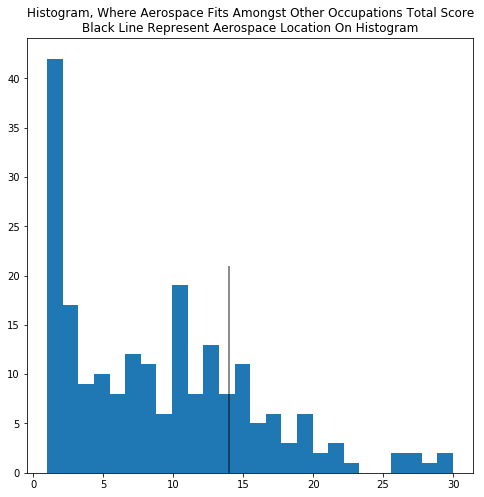

In [26]:
def get_location(factor):
    fig, ax = plt.subplots(figsize=(8,8))
    
    total = len(hw[factor].value_counts())
    ax.hist(hw[factor],bins=total)

    ae_total_score = ae[factor]

    ax.vlines(ae_total_score,ymin=0,ymax=hw[factor].value_counts().max(),alpha=.6)
    ax.set_title("Histogram, Where Aerospace Fits Amongst Other Occupations {}\nBlack Line Represent Aerospace Location On Histogram".format(factor))
    
get_location("Total Score")

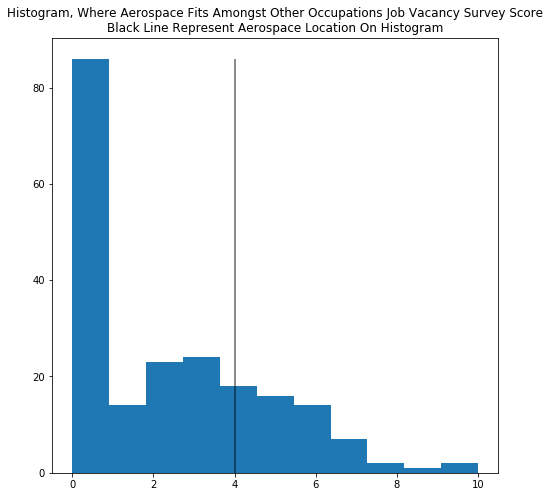

In [27]:
get_location("Job Vacancy Survey Score")

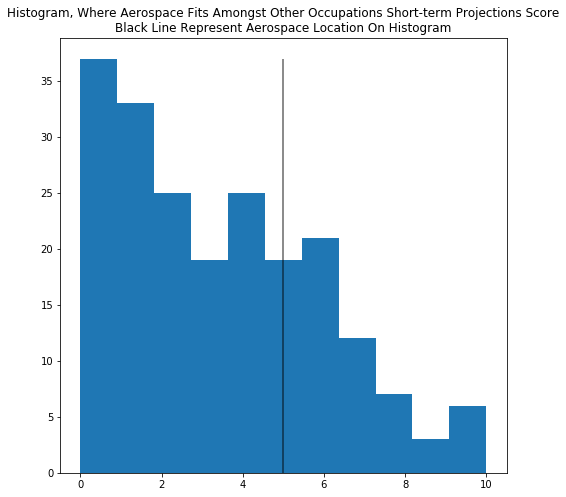

In [28]:
get_location("Short-term Projections Score")

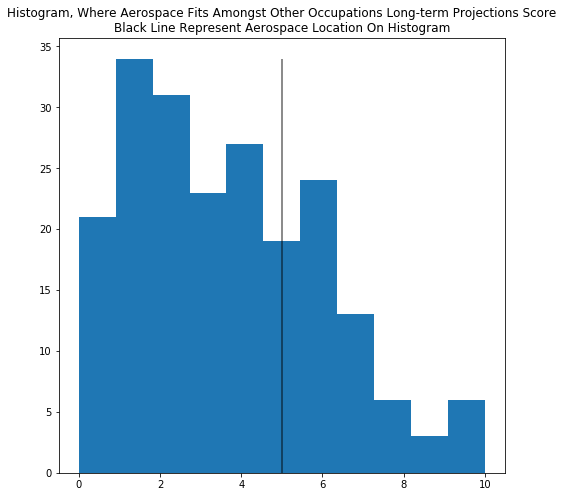

In [29]:
get_location("Long-term Projections Score")

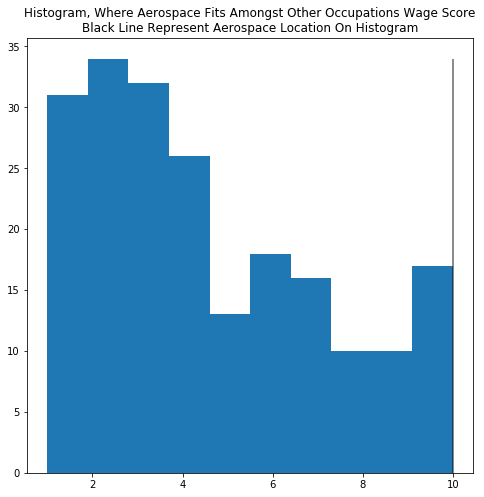

In [30]:
get_location("Wage Score")

### Thoughts on Aerospace
Any occupation that made this list has above average pay and demand.

Looking at the other high demand occupations, aerospace does not seem to stand out in an area except for wages.

While it does rank high (tied for 48th out of 207 occupations), there are clearly more occupations that rank higher. Many of those also require a degree, leading to the question of why engineering has received such a heavy investment compared to other, higher demand occupations.

Aerospace is ranked higher than engineering so the same holds true for the other occupations. 

# How many high demand high wage jobs need post secondary

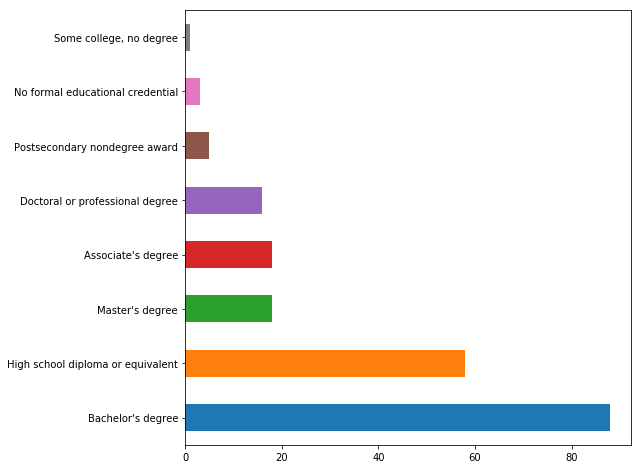

In [31]:
fig, ax = plt.subplots(figsize=(8,8))

hw["Education"].value_counts().plot(kind="barh",ax=ax)

# What about just high demand?

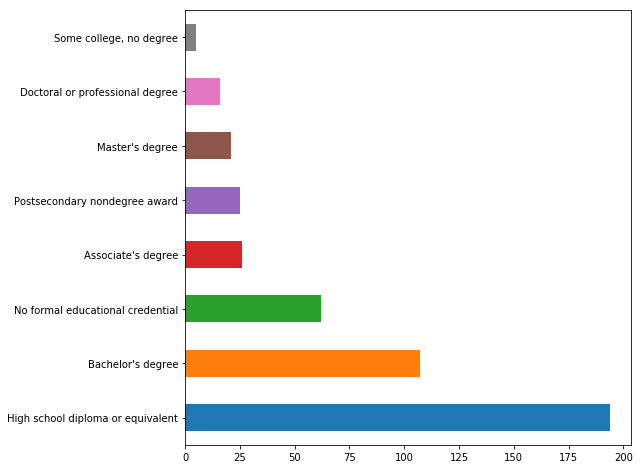

In [32]:
fig, ax = plt.subplots(figsize=(8,8))

hd["Education"].value_counts().plot(kind="barh",ax=ax)